# Практическое задание

 **1. Построение распределений**

**Распределение Рэлея** — *это распределение вероятностей случайной величины X* с плотностью:

$f(x; σ) = (x/σ^2) exp(-x^2/2σ^2), x\geq0, σ>0,$


где *σ* - параметр масштаба.

In [2]:
# Импортируем нужные модули
import scipy.stats as sps
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Отрисовка плотности распределения
def show_pdf(pdf, xmin, xmax, ymax, grid_size, distr_name, **kwargs):
    """
    Рисует график плотности непрерывного распределения
    
    pdf - плотность
    xmin, xmax - границы графика по оси x
    ymax - граница графика по оси y
    grid_size - размер сетки, по которой строится график
    distr_name - название распределения
    kwargs - параметры плотности
    """
    
    grid = np.linspace(xmin, xmax, grid_size)
    plt.figure(figsize=(12,5))
    plt.plot(grid, pdf(grid, **kwargs), lw=5)
    plt.grid(ls=':')
    plt.xlabel('Значение', fontsize=18)
    plt.ylabel('Плотность', fontsize=18)
    plt.xlim((xmin, xmax))
    plt.ylim((None, ymax))
    title = 'Плотность распределения {}'.format(distr_name)
    plt.title(title.format(**kwargs), fontsize=20)
    plt.show()

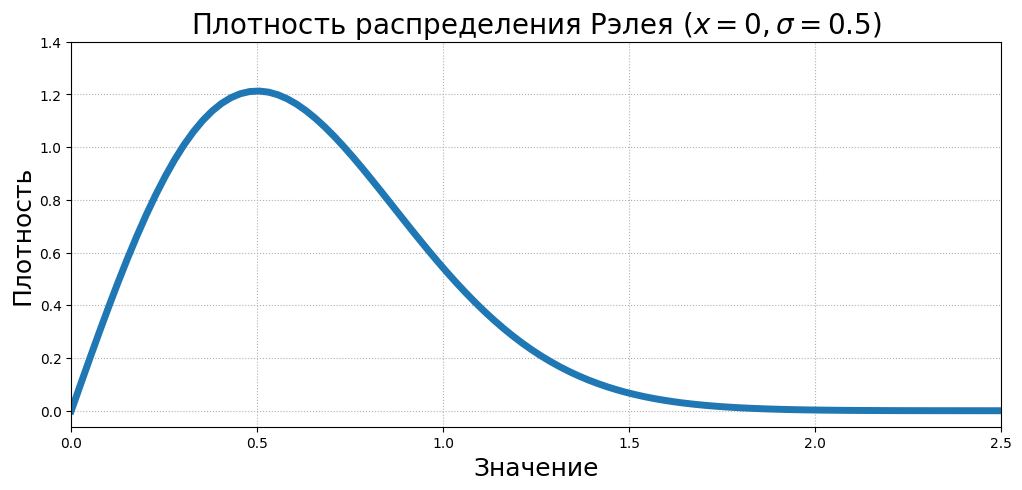

In [4]:
# Плотность распределения Рэлея
show_pdf(
    pdf=sps.rayleigh.pdf, xmin=0, xmax=2.5, ymax=1.4, grid_size=100,
    distr_name=r'Рэлея $(x={loc}, \sigma={scale})$', loc=0, scale=0.5
)

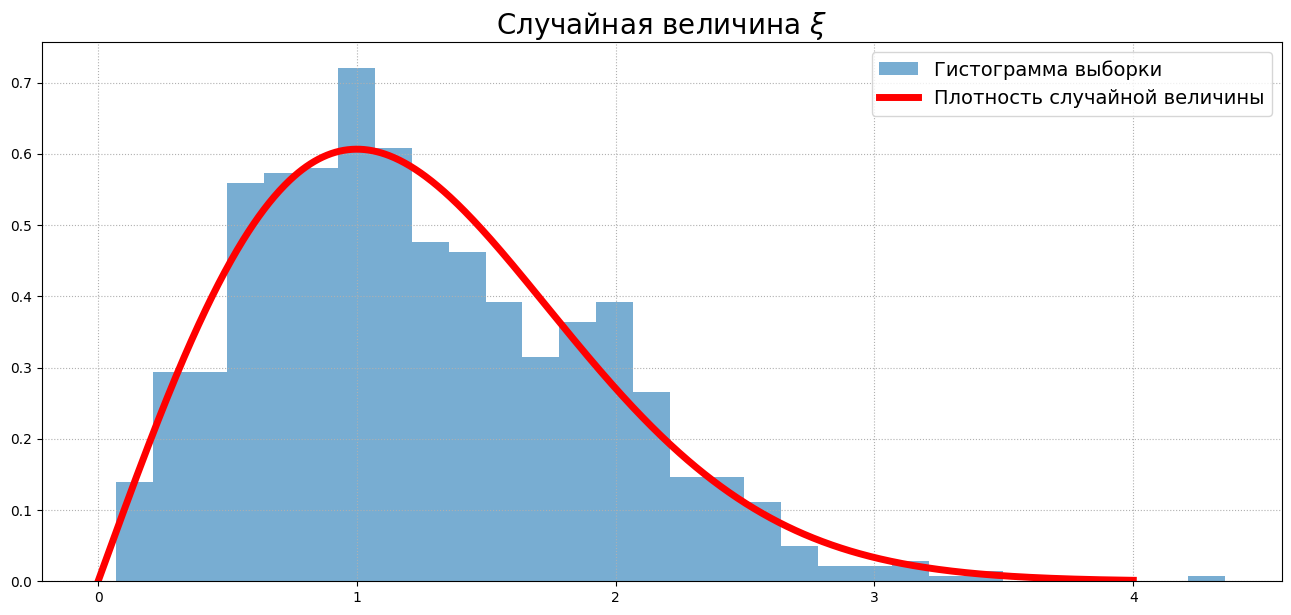

In [5]:
# Гистограмма выборки и плотность случайной величины

sample = sps.rayleigh.rvs(size=1000) #выборка размера 1000
grid = np.linspace(0, 4, 1000) #сетка для построения графика

plt.figure(figsize=(16, 7))
plt.hist(sample, bins=30, density=True,
        alpha=0.6, label='Гистограмма выборки')
plt.plot(grid, sps.rayleigh.pdf(grid), color='red',
        lw=5, label='Плотность случайной величины')
plt.title(r'Случайная величина $\xi$', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=':')
plt.show()

*Чем ближе гистограмма к границам красной линии, т.е. плотности случайной величины, тем чище эксперимент.*

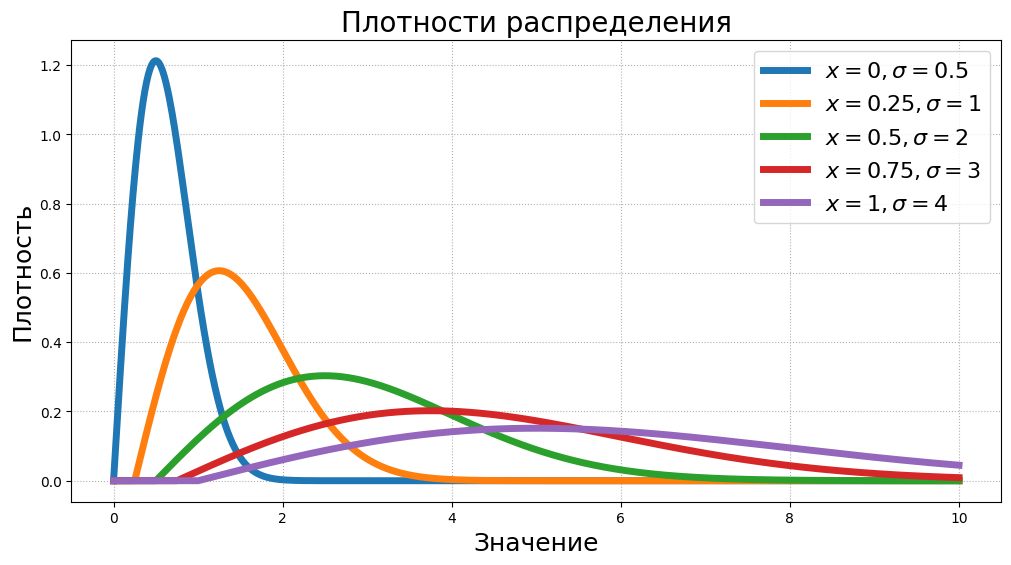

In [6]:
# Рассмотрим с разными значениями параметров распределения
grid = np.linspace(0, 10, 1000) # сетка для построения графика
loc_values = [0, 0.25, 0.5, 0.75, 1] # набор значений параметра x
sigma_values = [0.5, 1, 2, 3, 4] # набор значений параметра sigma(параметр масштаба)

plt.figure(figsize=(12, 6))

for i, (x, sigma) in enumerate(zip(loc_values, sigma_values)):
    plt.plot(grid, sps.rayleigh(x, sigma).pdf(grid), lw=5,
            label='$x={}, \sigma={}$'.format(x, sigma))

plt.legend(fontsize=16)
plt.title('Плотности распределения', fontsize=20)
plt.xlabel('Значение', fontsize=18)
plt.ylabel('Плотность', fontsize=18)
plt.grid(ls=':')
plt.show()

**2. Построение графика по функции**

Сгенерировать массивы по функции $(x^2 + y^2 - 1)^3 - x^2 y^3 = 0$ и построить на основе них график. 

Для построения графика неявной функции положим, что

*F - это одна часть выражения, G - это другая*

$F=(x^2 + y^2 - 1)^3, G=x^2 y^3, F-G=0$

In [124]:
# Генерируем точки для постройки графика
delta = 0.015
xrange = np.arange(-1.5, 1.5, delta)
yrange = np.arange(-1.5, 1.5, delta)
X, Y = np.meshgrid(xrange,yrange)

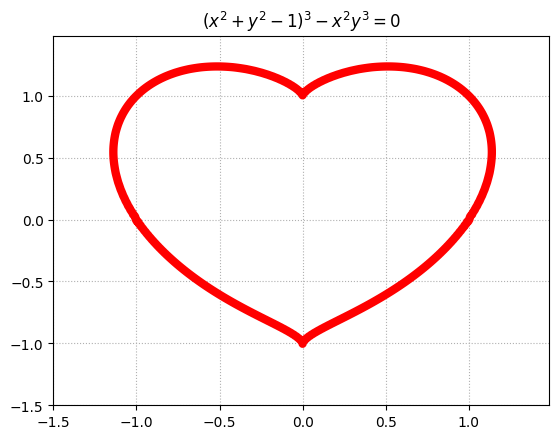

In [131]:
# Определим F и G
F = (X**2+Y**2-1)**3 
G = X**2*Y**3

# Построим график
plt.contour(X, Y, (F-G), [0], colors='red', linewidths=6)
plt.title('$(x^2+ y^2 - 1)^3 - x^2 y^3 = 0$')
plt.grid(ls=':')
plt.show()

**3. Анализ зависимостей**

Найти в датасете, приложенном к заданию, зависимости.

Определим параметры для анализа, исходя из датасета:

In [140]:
# Возраст
age = []
# Пол
sex = []
# Индекс массы тела
bmi = []
# Количество детей
children = []
# Курильщик
smoker = []
# Регион
region = []
# Затраты на страховку
charges = []

In [141]:
with open('./dataset_home.txt', mode='r') as file:
  for human in file.readlines():
    age.append(int(human.split(',')[0]))

    if human.split(',')[1] == 'male':
      sex.append(1)
    else:
      sex.append(0)
    
    bmi.append(float(human.split(',')[2]))

    children.append(int(human.split(',')[3]))

    if human.split(',')[4] == 'yes':
      smoker.append(1)
    else:
      smoker.append(0)

    if human.split(',')[5] == 'northwest':
      region.append(0)
    elif human.split(',')[5] == 'northeast':
      region.append(1)
    elif human.split(',')[5] == 'southwest':
      region.append(2)
    elif human.split(',')[5] == 'southeast':
      region.append(3)
    else:
      region.append(human.split(',')[5])
    
    charges.append(float(human.split(',')[6]))

In [142]:
# Преобразование в массивы NumPy
age = np.array(age)
sex = np.array(sex)
bmi = np.array(bmi)
children = np.array(children)
smoker = np.array(smoker)
region = np.array(region)
charges = np.array(charges)

**Статистические характеристики**

In [143]:
# Минимальное, максимальное и среднее значения возраста
age.min(), age.max(), age.mean()

(18, 64, 38.37761194029851)

In [144]:
# Минимальное, максимальное и среднее значения количества детей
children.min(), children.max(), children.mean()

(0, 5, 1.1059701492537313)

In [145]:
# Минимальное, максимальное и среднее значения уровня расхода на страховку
charges.min(), charges.max(), charges.mean()

(1131.5066, 62592.87309, 12899.874326014924)

**Анализ зависимостей**

**Возраст**

Text(0, 0.5, 'Возраст')

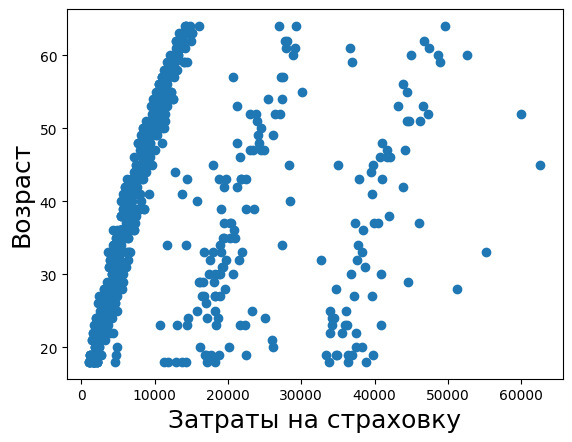

In [146]:
# Графическая зависимость возраста от трат на страховку
plt.scatter(charges, age)
plt.xlabel('Затраты на страховку', fontsize=18)
plt.ylabel('Возраст', fontsize=18)

Text(0, 0.5, 'Возраст')

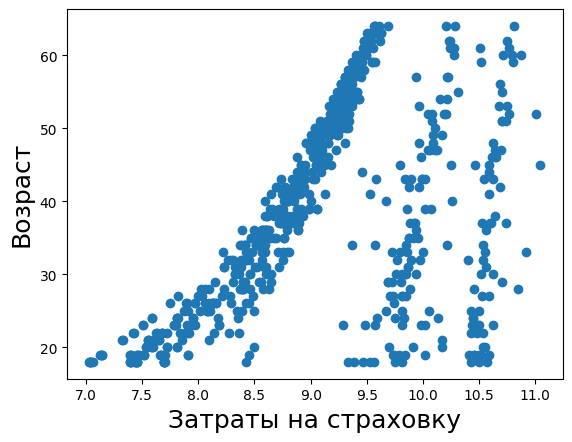

In [147]:
# Полулогарифмический масштаб
plt.scatter(np.log(charges), age)
plt.xlabel('Затраты на страховку', fontsize=18)
plt.ylabel('Возраст', fontsize=18)

*Наблюдаем слабую линейную **зависимость** возраста от затрат на страховку, видим **корреляцию**. Из графической зависимости следует, что при повышении возраста повышается расход на страховку.*

**Пол**

Text(0.5, 0, 'Пол')

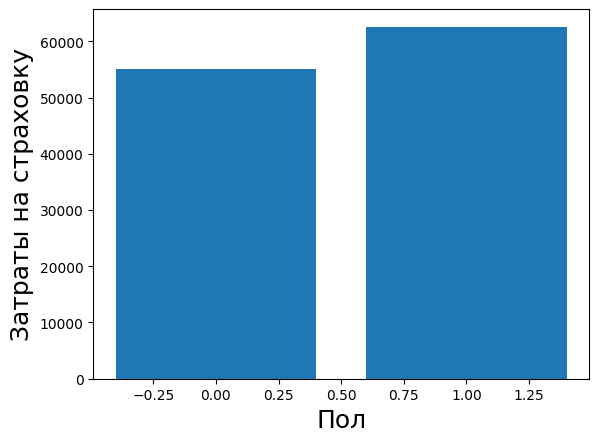

In [176]:
# Посмотрим, как тратятся на страховку мужчины и женщины
plt.bar(sex, charges) # Столбиковая диаграмма
plt.ylabel('Затраты на страховку', fontsize=18)
plt.xlabel('Пол', fontsize=18)

*Из графической зависимости следует, что затраты на страховку у мужчин выше, чем у женщин.*

**Индекс массы тела**

Text(0, 0.5, 'Индекс массы тела')

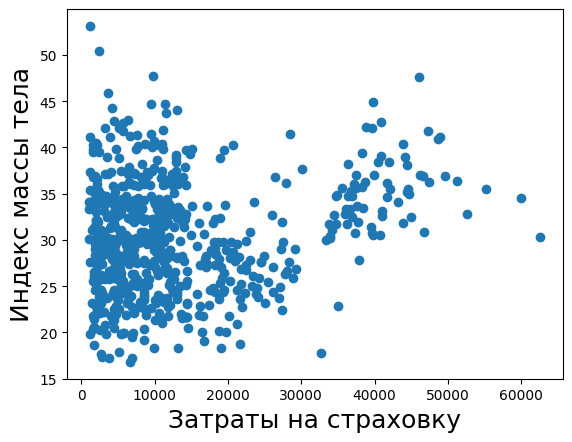

In [178]:
# Графическая зависимость индекса массы тела от трат на страховку
plt.scatter(charges, bmi)
plt.xlabel('Затраты на страховку', fontsize=18)
plt.ylabel('Индекс массы тела', fontsize=18)

Text(0, 0.5, 'Индекс массы тела')

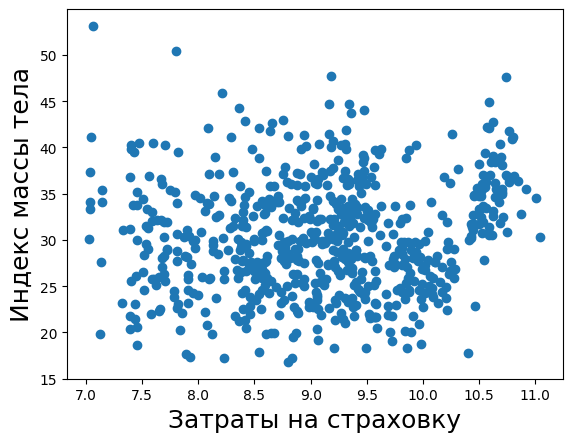

In [149]:
# Полулогарифмический масштаб
plt.scatter(np.log(charges), bmi)
plt.xlabel('Затраты на страховку', fontsize=18)
plt.ylabel('Индекс массы тела', fontsize=18)

*Из графика следует, что невидно четкой зависимости между индексом массы тела и затратами на страховку. Наблюдаем **независимость**.*

**Количество детей**

Text(0, 0.5, 'Количество детей')

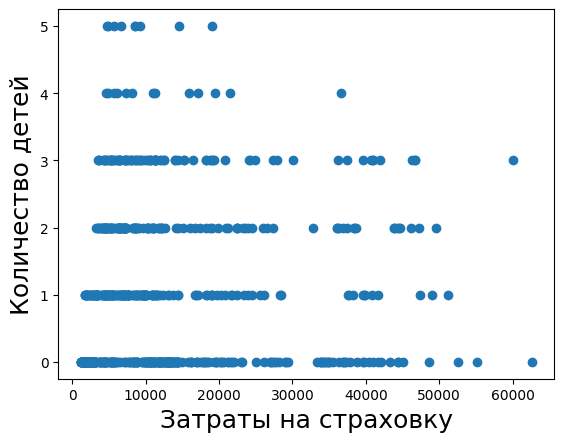

In [150]:
# Графическая зависимость количества детей от трат на страховку
plt.scatter(charges, children)
plt.xlabel('Затраты на страховку', fontsize=18)
plt.ylabel('Количество детей', fontsize=18)

*Из графической зависимости следует, что при 4-5 детях наблюдаем очень низкие затраты на страховку. Для 3-4 детей есть **выброс**.*

**Влияние табака**

Text(0, 0.5, 'Затраты на страховку')

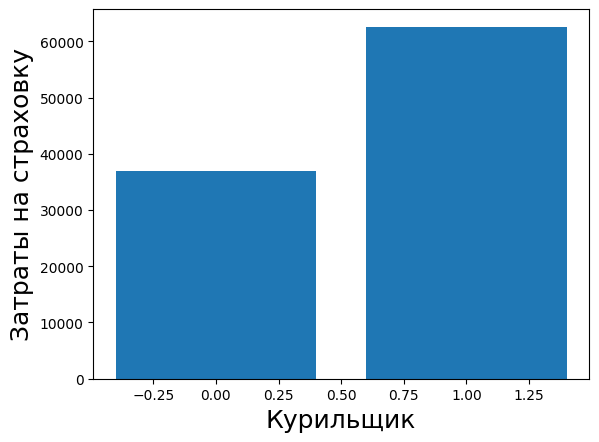

In [152]:
# Столбиковая диаграмма
plt.bar(smoker, charges)
plt.xlabel('Курильщик', fontsize=18)
plt.ylabel('Затраты на страховку', fontsize=18)

*Из графической зависимости следует, что расходы меньше у тех, кто не курит.*

**Регионы**

Text(0, 0.5, 'Затраты на страховку')

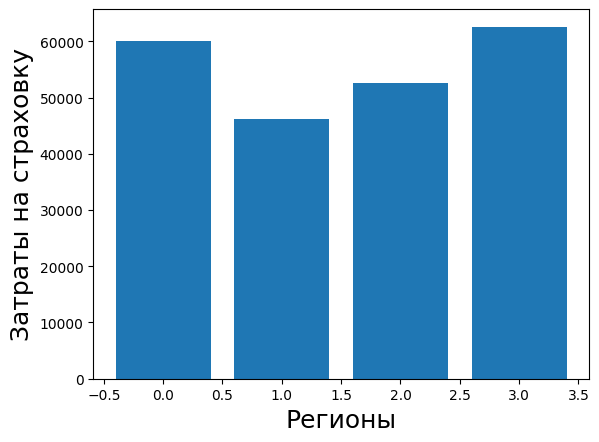

In [173]:
plt.bar(region, charges)
plt.xlabel('Регионы', fontsize=18)
plt.ylabel('Затраты на страховку', fontsize=18)

*Из графической зависимости следует, что расходы меньше у региона "northeast".*

**Затраты на страховку**

(array([278., 188.,  74.,  38.,  19.,  29.,  24.,  15.,   3.,   2.]),
 array([ 1131.5066  ,  7277.643249, 13423.779898, 19569.916547,
        25716.053196, 31862.189845, 38008.326494, 44154.463143,
        50300.599792, 56446.736441, 62592.87309 ]),
 <BarContainer object of 10 artists>)

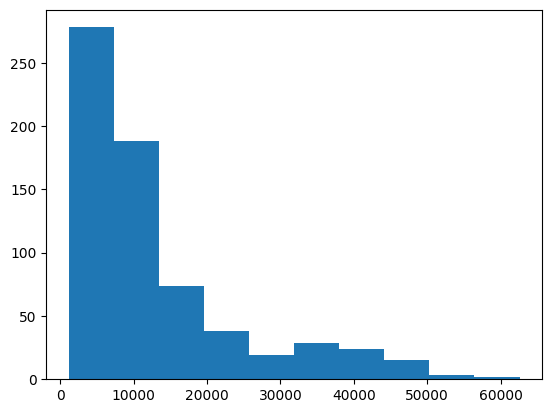

In [153]:
# Гистограмма затрат на страховку
plt.hist(charges)

*Из графической зависимости наблюдаем, что среднее значение затрат на страховку близко к 13000.*

**Кластеры**

**Возраст**

Выделим следующие классы:

In [155]:
# Количество людей меньше 36 лет, т.е. определим из диапазона значений от 18 до 35
age[age<36].shape

(307,)

In [156]:
# Количество людей старше 35 и меньше 56 лет
age[age>35][age[age>35]<56].shape

(269,)

*Из полученного следует, что преобладает молодое и среднее поколение.*

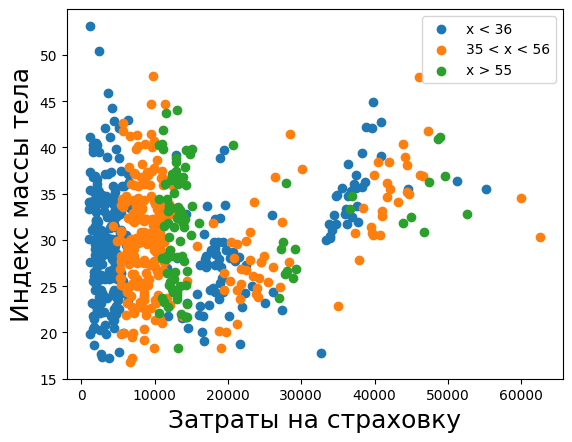

In [162]:
# Целевые группы в зависимости от возраста
plt.scatter(charges[age<36], bmi[age<36], label='x < 36')
plt.scatter(charges[age>35][age[age>35]<56], bmi[age>35][age[age>35]<56], label='35 < x < 56')
plt.scatter(charges[age>55], bmi[age>55], label='x > 55')
plt.legend()
plt.xlabel('Затраты на страховку', fontsize=18)
plt.ylabel('Индекс массы тела', fontsize=18)
plt.show()

*У людей возрастом выше 55 трат на страховку намного больше, чем у людей младше. Наблюдаем **типичные значения**. У нас есть три целевые группы, все остальное - это **выбросы**.*

**Индекс массы тела**

(array([ 27.,  80., 129., 153., 142.,  79.,  44.,  11.,   3.,   2.]),
 array([16.815 , 20.4465, 24.078 , 27.7095, 31.341 , 34.9725, 38.604 ,
        42.2355, 45.867 , 49.4985, 53.13  ]),
 <BarContainer object of 10 artists>)

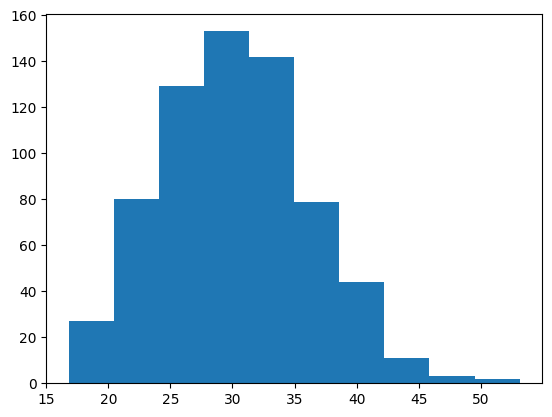

In [109]:
# Гистограмма индекса массы тела
plt.hist(bmi)

*Визуальный анализ графика-гистограммы позволяет заключить, что распределение значений переменной соответствует нормальному закону.*

Выделим следующие классы:

In [101]:
# вес по индексу меньше 23 
bmi[bmi<23].shape

(76,)

In [102]:
# 22 < x < 38
bmi[bmi>22][bmi[bmi>22]<38].shape

(550,)

In [104]:
# индекс веса больше 37
bmi[bmi>37].shape

(88,)

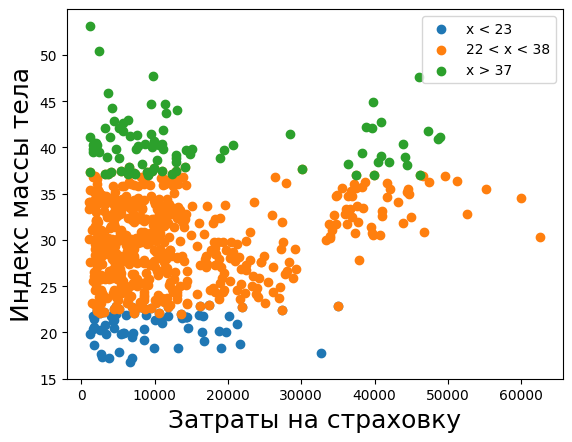

In [163]:
# Целевые группы в зависимости от индекса массы тела
plt.scatter(charges[bmi<23], bmi[bmi<23], label='x < 23')
plt.scatter(charges[bmi>22][bmi[bmi>22]<38], bmi[bmi>22][bmi[bmi>22]<38], label='22 < x < 38')
plt.scatter(charges[bmi>37], bmi[bmi>37], label='x > 37')
plt.legend()
plt.xlabel('Затраты на страховку', fontsize=18)
plt.ylabel('Индекс массы тела', fontsize=18)
plt.show()

*Видим, что группы желтая и зеленая тратят на страховку намного больше. У людей всех целевых групп, связанных с индексом массы тела, затраты на страховку, в основном, близки к 10000. Наблюдаем **типичные значения**.*